In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
pd.set_option('display.max_rows', 200000)

## Lendo os dados de treino e teste

In [4]:
df_train = pd.read_csv('train.csv', sep = ',')

In [5]:
df_test = pd.read_csv('test.csv', sep = ',')

## Fazendo a verificação dos dados de treino

In [6]:
train_columns = df_test.columns.to_list() + ['NU_NOTA_MT']

In [7]:
df_train = df_train[train_columns]

In [8]:
df_train.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


## Verficando os dados nulos nas notas de matemática

In [9]:
df_train['NU_NOTA_MT'].isna().sum()

3597

In [10]:
valores_nulos = df_train.loc[df_train['NU_NOTA_MT'].isna()]

In [11]:
valores_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 2 to 13722
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            3597 non-null   object 
 1   CO_UF_RESIDENCIA        3597 non-null   int64  
 2   SG_UF_RESIDENCIA        3597 non-null   object 
 3   NU_IDADE                3597 non-null   int64  
 4   TP_SEXO                 3597 non-null   object 
 5   TP_COR_RACA             3597 non-null   int64  
 6   TP_NACIONALIDADE        3597 non-null   int64  
 7   TP_ST_CONCLUSAO         3597 non-null   int64  
 8   TP_ANO_CONCLUIU         3597 non-null   int64  
 9   TP_ESCOLA               3597 non-null   int64  
 10  TP_ENSINO               643 non-null    float64
 11  IN_TREINEIRO            3597 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  643 non-null    float64
 13  IN_BAIXA_VISAO          3597 non-null   int64  
 14  IN_CEGUEIRA             3597 non-null  

### Verificar se TP_PRESENCA_LC indica alguma relação com as notas nulas em matemática.
### 0 - Faltou
### 1 - Presente
### 2 - Eliminado

In [12]:
valores_nulos['TP_PRESENCA_LC'].unique() # significa que o aluno faltou ou foi eliminado

array([0, 2], dtype=int64)

## Verificando as correlações

In [13]:
corr_train = df_train.corr()

In [14]:
corr_mat = corr_train.loc['NU_NOTA_MT']

- tirando as melhores correlações com a nota de matematica

In [15]:
up_corr = corr_mat[corr_mat >= 0.25]

In [16]:
df_aux = up_corr.to_frame().reset_index()
df_aux.rename(columns = {'index' : 'colunas'}, inplace = True)
colunas_aux = df_aux.colunas.to_list() 

In [17]:
colunas_aux

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'NU_NOTA_MT']

- fazendo a correlação com o df_train

In [18]:
corr = df_train[colunas_aux].corr()
corr

,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
TP_DEPENDENCIA_ADM_ESC,1.000000,0.393774,0.338486,0.299387,0.233368,0.282586,0.282997,0.264291,0.252388,0.297040,0.373233
NU_NOTA_CN,0.393774,1.000000,0.609543,0.545667,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938,0.584941
NU_NOTA_CH,0.338486,0.609543,1.000000,0.692988,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582,0.529594
NU_NOTA_LC,0.299387,0.545667,0.692988,1.000000,0.430603,0.453262,0.475390,0.467356,0.441696,0.512908,0.494695
NU_NOTA_COMP1,0.233368,0.357672,0.443809,0.430603,1.000000,0.756664,0.759452,0.824538,0.558587,0.862744,0.299402
NU_NOTA_COMP2,0.282586,0.412894,0.488050,0.453262,0.756664,1.000000,0.875447,0.808006,0.655915,0.918278,0.335638
NU_NOTA_COMP3,0.282997,0.429447,0.510452,0.475390,0.759452,0.875447,1.000000,0.827151,0.664350,0.925813,0.350307
NU_NOTA_COMP4,0.264291,0.407747,0.488797,0.467356,0.824538,0.808006,0.827151,1.000000,0.635018,0.914505,0.342282
NU_NOTA_COMP5,0.252388,0.416349,0.494798,0.441696,0.558587,0.655915,0.664350,0.635018,1.000000,0.816248,0.343337
NU_NOTA_REDACAO,0.297040,0.459938,0.550582,0.512908,0.862744,0.918278,0.925813,0.914505,0.816248,1.000000,0.379376


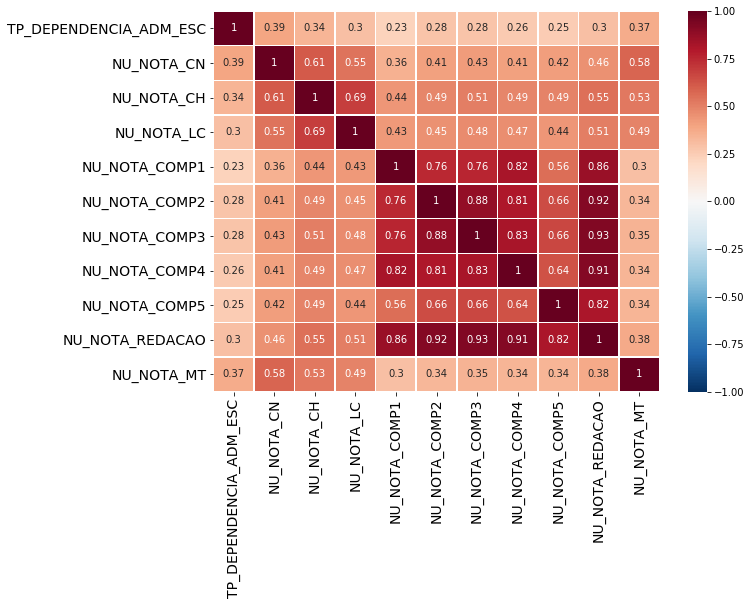

In [19]:
plt.figure(figsize = (10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,vmin=-1, vmax=1, linewidths=.5, cmap = "RdBu_r",annot=True)
plt.show()

In [20]:
variaveis = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

## Removendo os valores nulos dos dados de treino

In [21]:
df_train = df_train[(df_train['NU_NOTA_MT'].notnull()) & (df_train['NU_NOTA_MT'] != 0)]

In [22]:
df_train.fillna(0,inplace = True)

## Removendo os valores nulos dos dados de teste

- Como a NU_NOTA_LC ocorre no mesmo dia da prova de matemática e como vista acima, as notas com valores nulos são para os alunos, faltantes ou eliminados, optei por remover as linhas nulas nessa coluna.

In [23]:
df_test = df_test[df_test['NU_NOTA_LC'].notnull()]

In [24]:
df_test.fillna(0, inplace = True)

## Criando o modelo de Regressão Linear

In [25]:
df_train = df_train[variaveis]

In [26]:
df_train.head(2)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,436.3,495.4,581.2,399.4
1,474.5,544.1,599.0,459.8


In [27]:
y_train = df_train['NU_NOTA_MT']
X_train = df_train.drop(columns = 'NU_NOTA_MT')

In [28]:
X_test = df_test[X_train.columns]

In [29]:
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_previsto = modelo.predict(X_test)

In [33]:
resposta = pd.DataFrame()

In [34]:
resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [35]:
resposta['NU_NOTA_MT'] = np.around(y_previsto,2)

In [36]:
resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,440.33
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.04
2,b38a03232f43b11c9d0788abaf060f7366053b6d,585.55
4,715494628a50142ce8cb17191cfe6d0f3cae0934,553.62
5,e656d6bad65c93fb2880f1eba5037008c8e75774,469.12


In [37]:
resposta.to_csv('answer.csv', index=False, header=True)